# Applying Unsupervised Learning to Customer Data - Small Dataset
The general use of unsupervised learning is for data mining.  For the most part, we use this when we have no idea about the underlying system and we wish to learn something from the data to kickstart your research.  In this example, we use hierarchical clustering to cluster customers into different groups.  We will use the following python modules for this excercise:

* `numpy`
* `scipy`
* `pandas`
* `sklearn`

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sci_clus
from sklearn.cluster import AgglomerativeClustering as ac
from sklearn.cluster import KMeans as km

plt.rcParams['figure.figsize'] = [15, 7]

# The Data
We have a dataset of Gender, Age, Annual Income and Spending habits on 200 customers.  Our objective is to find a way to examine spending trends.

In [2]:
data = pd.read_csv('data.csv')
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


An good way to look a this problem is to look at `Annual Income` and `Spending Scores`.  However, a scatter plot of the data does not reveal clear relationship.  However, it is quite clear that the data fall into clusters given the two features.

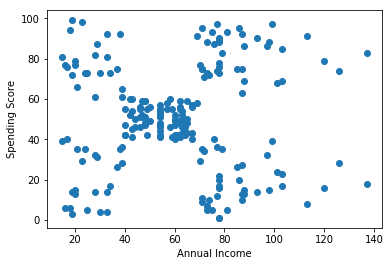

In [3]:
plt.scatter(data.iloc[:, 3] ,data.iloc[:,4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Clustering Using HCA
We determine the optimal number of clusters by using a dendrogram.  Specifically, we use the hierarchy cluster library from `scipy` to generate the denogram.  Note that the method of choice here is `ward` since we wish the minimize the variance in distance between the clusters.

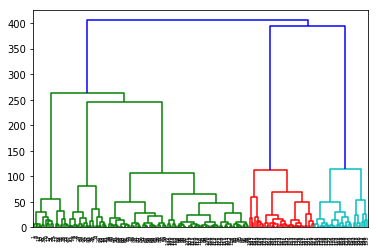

In [4]:
X = data.iloc[:, [3,4]].values
denogram = sci_clus.dendrogram(sci_clus.linkage(X, method = 'ward'))

If we draw a horizontal line that passes through longest vertical line, we get 5 clusters.  The actual clustering is done using the `AgglomerativeClustering` class in the `sklearn.cluster` library.

In [5]:
hc = ac(n_clusters= 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Graphically, we have

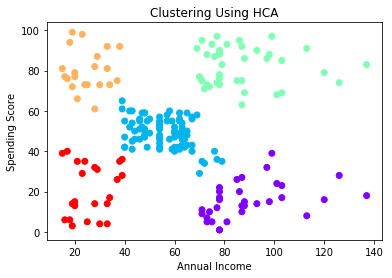

In [6]:
plt.scatter(X[:,0], X[:,1], c=y_hc, cmap='rainbow')
plt.title('Clustering Using HCA')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Alternatively, we can append the new cluster information into the dataset and examine the data in each cluster.

In [7]:
data = pd.concat([data, pd.DataFrame(y_hc, columns=['HCA Cluster'])], axis=1)
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),HCA Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# Clustering Using K-means
Alternatively we can use k-means as the method to cluster the data.  Using our optimal cluster number from the above we use the `KMeans` class in the `sklearn.cluster` library.

In [8]:
kmeans = km(n_clusters= 5)
y_km = kmeans.fit_predict(X)

And we get fairly similar results.

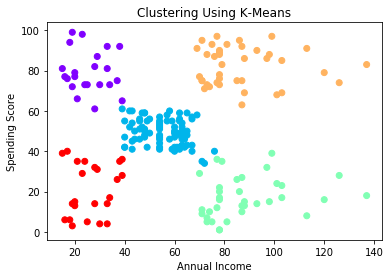

In [9]:
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='rainbow')
plt.title('Clustering Using K-Means')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()